題目：將 Kaggle Dataset SMS 文件以機器學習方式分辨是否為垃圾郵件  
說明：輸入文件 spam.csv 是一個至少有兩欄 v1 和 v2 的 csv 檔，v1 註明該簡訊是 ham 還是spam，v2 是 sms 內容本身，我們在讀入後先去掉不必要的欄位內容，將欄位名稱改為 labels 和 data，再將 labels 內容改成 0/1，0 代表 ham1 代表 spam。接著將內容切割成訓練集和測試集，再用 tokenizer 做前處理，最後形成可以分析的格式。建模分析之後我們印出訓練和測試準確度，然後以 word cloud 畫出 spam 和 ham 常用的字，再分別印出判斷錯誤的 SMS 供未來改進。  
延伸：可用不同的 tokenizer，不同的 ML 分類器做改進準確率的比較。  
範例程式檔名：spam_sms_ 垃圾簡訊偵測器.py，以 Naïve Bayes (MultinomialNB) 方式完成  
模組：sklearn, pandas, numpy, wordcloud  
輸入檔：spam.csv  
成績：辨識百分率  

In [1]:
from future.utils import iteritems
from builtins import range


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam(作業數據).csv', encoding='ISO-8859-1')

# 刪除不必要的欄位
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# 重新命名欄位
df.columns = ['labels', 'data']

# 二元數位化標記(labels)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# 分為訓練與測試組
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

# 方法1:以TF-IDF 為特徵
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

In [3]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9699973211893919
test score: 0.9548667754214247


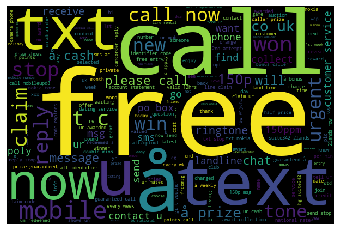

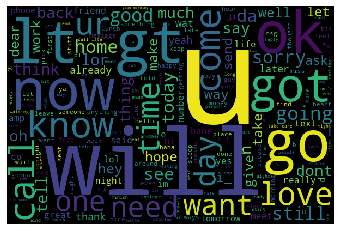

n 18
We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
We have new local dates in your area - Lots of new people registered in YOUR AREA. Reply DATE to start now! 18 only www.flirtparty.us REPLYS150
Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058091854 NOW all will be revealed. PO BOX385 M6 6WU
Dear Subscriber ur draw 4 å£100 gift voucher will b entered on receipt of a correct ans. When was Elvis Presleys Birthday? TXT answer to 80062
Bored of speed dating? Try SPEEDCHAT, txt SPEEDCHAT to 80155, if you don't like em txt SWAP and get a new chatter! Chat80155 POBox36504W45WQ 150p/msg rcd 16
For taking part in our mobile survey yesterday! You can now have 500 texts 2 use however you wish. 2 get txts just send TXT to 80160 T&C www.txt43.com 1.50p
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
1000's of girls many local 2 u who r

In [4]:
# 以wordcloud visualize 數據
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')


# 找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)


In [5]:
model = LogisticRegression()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9726761317974819
test score: 0.965742251223491


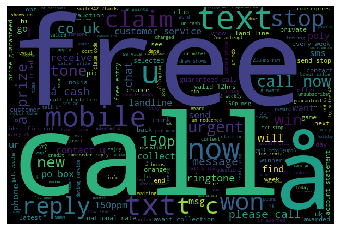

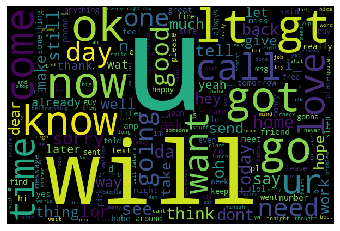

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
SMS. ac Blind Date 4U!: Rodds1 is 21/m from Aberdeen, United Kingdom. Check Him out http://img. sms. ac/W/icmb3cktz8r7!-4 no Blind Dates send HIDE
Call Germany for only 1 pence per minute! Call from

In [6]:
# 以wordcloud visualize 數據
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')


# 找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)